# Importing the necessary libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import pylab as pl
import seaborn as sns
%matplotlib inline

#Reading the Data

In [2]:
covid_data = pd.read_csv('owid-covid-data.csv');
covid_data.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
5,AFG,Asia,Afghanistan,2020-02-29,1.0,0.0,0.143,NaN,NaN,0.0,0.026,0.000,0.004,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
6,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,0.143,NaN,NaN,0.0,0.026,0.000,0.004,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
7,AFG,Asia,Afghanistan,2020-03-02,1.0,0.0,0.000,NaN,NaN,0.0,0.026,0.000,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
8,AFG,Asia,Afghanistan,2020-03-03,2.0,1.0,0.143,NaN,NaN,0.0,0.051,0.026,0.004,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
9,AFG,Asia,Afghanistan,2020-03-04,4.0,2.0,0.429,NaN,NaN,0.0,0.103,0.051,0.011,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# Analyzing the rows and columns count of the dataset

In [3]:
covid_data.shape

(81905, 59)

# Analyzing the data types of all the attributes present and their count

In [4]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81905 entries, 0 to 81904
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               81905 non-null  object 
 1   continent                              77929 non-null  object 
 2   location                               81905 non-null  object 
 3   date                                   81905 non-null  object 
 4   total_cases                            80087 non-null  float64
 5   new_cases                              80085 non-null  float64
 6   new_cases_smoothed                     79084 non-null  float64
 7   total_deaths                           70548 non-null  float64
 8   new_deaths                             70706 non-null  float64
 9   new_deaths_smoothed                    79084 non-null  float64
 10  total_cases_per_million                79653 non-null  float64
 11  ne


# Descripting of the numerical attributes present in the dataset

In [5]:
covid_data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,8.008700e+04,80085.000000,79084.000000,7.054800e+04,70706.000000,79084.000000,79653.000000,79651.000000,78655.000000,70127.000000,70285.000000,78655.000000,66030.000000,8456.000000,8456.000000,10127.000000,10127.000000,743.000000,743.000000,1240.000000,1240.000000,3.765400e+04,3.736300e+04,37363.000000,37654.000000,4.307300e+04,43073.000000,41415.000000,40823.000000,7.673000e+03,7.000000e+03,5.031000e+03,6.520000e+03,1.224000e+04,7673.000000,7000.00000,5031.000000,12240.000000,69674.000000,8.138000e+04,76277.000000,73893.000000,73047.000000,73478.000000,74212.000000,50590.000000,74843.000000,75854.000000,58689.000000,57822.000000,37582.000000,68348.000000,77738.000000,74741.000000
mean,7.683676e+05,5540.994106,5518.505084,2.182350e+04,135.951758,120.048199,9311.101829,72.484473,72.352323,211.064043,1.475329,1.300110,1.022038,1032.227412,24.683618,4765.028241,165.613372,271.228685,20.480506,3935.503165,113.637663,4.174544e+04,5.582323e+06,211.232143,1.785804,3.998275e+04,1.689757,0.088577,161.522740,1.174632e+07,7.628427e+06,3.806928e+06,3.873440e+05,2.064776e+05,11.132635,7.93359,4.308195,2645.365768,58.757848,1.291538e+08,344.361416,30.528131,8.778201,5.561389,19136.919508,13.323070,257.582856,7.808984,10.526535,32.655523,50.940691,3.031034,73.161666,0.727364
std,5.334419e+06,34175.810247,33553.248884,1.286898e+05,741.351249,677.067397,18015.447434,174.880980,147.960887,371.644095,3.961416,2.894261,0.360369,3024.061648,27.082366,12539.248661,206.906237,570.645988,36.851142,11724.177615,232.836546,1.561512e+05,2.548192e+07,455.494550,5.107638,1.432021e+05,4.167166,0.097774,877.283743,5.141004e+07,3.049630e+07,1.406576e+07,1.522239e+06,1.025744e+06,19.760282,12.65662,8.931584,4775.594560,21.773363,6.925266e+08,1678.772284,9.113781,6.228651,4.253007,19795.097533,19.933073,118.693244,3.963592,10.402073,13.475120,31.764561,2.464501,7.550461,0.150074
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,-76.445000,-10.921000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.391720e+05,0.000000e+00,0.000000,-23.010000,0.000000e+00,0.000000,0.000000,1.300000,0.000000e+00,0.000000e+00,1.000000e+00,-2.928600e+04,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,8.090000e+02,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000
25%,8.670000e+02,2.000000,6.571000,4.200000e+01,0.000000,0.000000,186.635000,0.175000,1.108500,6.452500,0.000000,0.000000,0.860000,24.000000,3.675000,99.000000,20.794000,7.896500,1.678000,53.242250,9.064750,1.392000e+03,1.165075e+05,10.561000,0.120000,1.421000e+03,0.118000,0.016000,7.800000,5.301900e+04,4.593825e+04,2.357000e+04,3.137250e+03,9.550000e+02,0.820000,0.71000,0.360000,305.000000,44.440000,2.540916e+06,36.253000,

# Identifying the columns present

In [6]:
covid_data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

#Checking for count of all the unique values present for each attribute

In [7]:
covid_data.nunique()

iso_code                                   215
continent                                    6
location                                   215
date                                       471
total_cases                              43054
new_cases                                11214
new_cases_smoothed                       21329
total_deaths                             16380
new_deaths                                2670
new_deaths_smoothed                       5963
total_cases_per_million                  61822
new_cases_per_million                    35394
new_cases_smoothed_per_million           39863
total_deaths_per_million                 38023
new_deaths_per_million                    6866
new_deaths_smoothed_per_million           8182
reproduction_rate                          372
icu_patients                              2243
icu_patients_per_million                  4700
hosp_patients                             4353
hosp_patients_per_million                 7621
weekly_icu_ad

 Checking for count of NULL values for each column 

In [8]:
covid_data.isnull().sum()

iso_code                                     0
continent                                 3976
location                                     0
date                                         0
total_cases                               1818
new_cases                                 1820
new_cases_smoothed                        2821
total_deaths                             11357
new_deaths                               11199
new_deaths_smoothed                       2821
total_cases_per_million                   2252
new_cases_per_million                     2254
new_cases_smoothed_per_million            3250
total_deaths_per_million                 11778
new_deaths_per_million                   11620
new_deaths_smoothed_per_million           3250
reproduction_rate                        15875
icu_patients                             73449
icu_patients_per_million                 73449
hosp_patients                            71778
hosp_patients_per_million                71778
weekly_icu_ad

# Continents in terms of occurence of covid cases on basis of iso_codes

In [9]:
covid_data.continent.value_counts()[0:10]

Africa           21430
Europe           19696
Asia             19504
North America     9811
South America     5048
Oceania           2440
Name: continent, dtype: int64


# Analyzing cases worldwide 

In [10]:
dataset = covid_data[covid_data['date']=='2020-11-15']
dataset = dataset[~dataset['location'].isin(['World','International'])]
dataset.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
265,AFG,Asia,Afghanistan,2020-11-15,43240.0,205.0,154.429,1620.0,12.0,7.857,1110.759,5.266,3.967,41.615,0.308,0.202,1.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.04,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511
693,OWID_AFR,NaN,Africa,2020-11-15,1976022.0,12570.0,13308.857,47362.0,296.0,286.000,1473.985,9.376,9.928,35.329,0.221,0.213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1109,ALB,Europe,Albania,2020-11-15,27830.0,597.0,517.714,623.0,11.0,9.143,9670.582,207.450,179.899,216.485,3.822,3.177,1.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2106.0,147986.0,51.423,0.732,1906.0,0.662,0.272,3.7,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.74,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
1525,DZA,Africa,Algeria,2020-11-15,67679.0,860.0,804.000,2154.0,15.0,15.143,1543.384,19.612,18.335,49.121,0.342,0.345,1.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.22,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748
1935,AND,Europe,Andorra,2020-11-15,5872.0,147.0,69.857,76.0,1.0,0.143,75998.188,1902.543,904.124,983.628,12.942,1.849,0.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,772.0,9.992,0.090,11.1,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.26,7.726500e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868
2327,AGO,Africa,Angola,2020-11-15,13451.0,77.0,145.429,322.0,0.0,2.143,409.265,2.343,4.425,9.797,0.000,0.065,0.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.19,3.286627e+07,23.890,16.8,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581
2794,ATG,North America,Antigua and Barbuda,2020-11-15,134.0,0.0,0.429,4.0,0.0,0.143,1368.352,0.000,4.376,40.846,0.000,1.459,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.792800e+04,231.845,32.1,6.933,4.631,21490.943,NaN,191.511,13.17,NaN,NaN,NaN,3.80,77.02,0.778
3265,ARG,South America,Argentina,2020-11-15,1310491.0,5645.0,9758.429,35436.0,129.0,268.000,28995.873,124.901,215.915,784.056,2.854,5.930,0.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10685.0,3445735.0,76.240,0.236,20806.0,0.460,0.248,4.0,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.17,4.519578e+07,16.177,31.9,11.198,7.441,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845
3676,ARM,Asia,Armenia,2020-11-15,117337.0,1482.0,1559.000,1763.0,25.0,29.143,39597.615,500.129,526.114,594.958,8.437,9.835,0.84,NaN,NaN,NaN,NaN

In [11]:

# download countries geojson file
!wget --quiet https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json
    
print('GeoJSON file downloaded!')
world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)

# generate choropleth map using the total deaths worldwide
world_map.choropleth(
    geo_data=world_geo,
    data=dataset,
    columns=['location', 'total_deaths'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Covid 19 deaths worldwide'
)

# display map
world_map

GeoJSON file downloaded!


/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [36]:

#Top 10 countries in terms of total_deaths
top_10_deaths  =  dataset.sort_values("total_deaths",ascending = False)
top_10_deaths.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
54169,OWID_NAM,NaN,North America,2020-11-15,13159526.0,146741.0,165038.286,372855.0,1155.0,1792.857,22226.218,247.843,278.747,629.746,1.951,3.028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.920722e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25118,OWID_EUR,NaN,Europe,2020-11-15,14004896.0,200180.0,259243.571,323403.0,2883.0,4223.571,18706.116,267.377,346.267,431.964,3.851,5.641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.486801e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68295,OWID_SAM,NaN,South America,2020-11-15,10345096.0,32500.0,51460.429,309874.0,626.0,1073.143,24015.929,75.448,119.464,719.366,1.453,2.491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.307598e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4126,OWID_ASI,NaN,Asia,2020-11-15,15118723.0,81910.0,93796.714,266621.0,1463.0,1556.571,3258.453,17.654,20.215,57.463,0.315,0.335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.639847e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77940,USA,North America,United States,2020-11-15,11144288.0,136224.0,150986.857,247609.0,775.0,1165.429,33668.275,411.550,456.150,748.057,2.341,3.521,1.22,16798.0,50.749,69440.0,209.787,NaN,NaN,71017.0,214.551,1193527.0,176502691.0,533.236,3.606,1573741.0,4.754,0.097,10.3,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.28,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
25567,OWID_EUN,NaN,European Union,2020-11-15,9379723.0,132080.0,184642.714,215671.0,2112.0,3031.000,21081.864,296.863,415.003,484.742,4.747,6.812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.449191e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10753,BRA,South America,Brazil,2020-11-15,5863093.0,14134.0,28425.429,165798.0,140.0,485.857,27583.314,66.494,133.729,780.008,0.659,2.286,1.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.17,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
33938,IND,Asia,India,2020-11-15,8845127.0,30548.0,41638.571,130070.0,435.0,494.143,6409.492,22.136,30.173,94.253,0.315,0.358,0.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,805589.0,124836819.0,90.461,0.584,1014290.0,0.735,0.041,24.4,samples tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.57,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.645
47887,MEX,North America,Mexico,2020-11-15,1006522.0,3269.0,5528.143,98542

Text(0.5, 1.0, 'Total deaths across the top 5 countries')

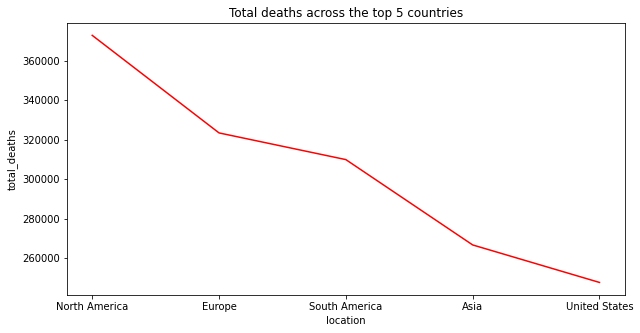

In [37]:
plt.figure(figsize=(10,5))
sns.lineplot(x='location',y='total_deaths',data=top_10_deaths[0:5],color='red')
plt.title("Total deaths across the top 5 countries")

In [38]:
#Top 10 countries in terms of total_deaths
top_10_new_cases  =  dataset.sort_values("new_cases",ascending = False)
top_10_new_cases.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
25118,OWID_EUR,NaN,Europe,2020-11-15,14004896.0,200180.0,259243.571,323403.0,2883.0,4223.571,18706.116,267.377,346.267,431.964,3.851,5.641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.486801e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54169,OWID_NAM,NaN,North America,2020-11-15,13159526.0,146741.0,165038.286,372855.0,1155.0,1792.857,22226.218,247.843,278.747,629.746,1.951,3.028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.920722e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77940,USA,North America,United States,2020-11-15,11144288.0,136224.0,150986.857,247609.0,775.0,1165.429,33668.275,411.550,456.150,748.057,2.341,3.521,1.22,16798.0,50.749,69440.0,209.787,NaN,NaN,71017.000,214.551,1193527.0,176502691.0,533.236,3.606,1573741.0,4.754,0.097,10.3,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.28,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
25567,OWID_EUN,NaN,European Union,2020-11-15,9379723.0,132080.0,184642.714,215671.0,2112.0,3031.000,21081.864,296.863,415.003,484.742,4.747,6.812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.449191e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4126,OWID_ASI,NaN,Asia,2020-11-15,15118723.0,81910.0,93796.714,266621.0,1463.0,1556.571,3258.453,17.654,20.215,57.463,0.315,0.335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.639847e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36984,ITA,Europe,Italy,2020-11-15,1178529.0,33977.0,34775.000,45229.0,546.0,547.857,19492.117,561.958,575.156,748.059,9.030,9.061,1.07,3422.0,56.598,35469.0,586.635,NaN,NaN,17152.726,283.695,195275.0,18878386.0,312.236,3.230,214810.0,3.553,0.162,6.2,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.63,6.046183e+07,205.859,47.9,23.021,16.240,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892
68295,OWID_SAM,NaN,South America,2020-11-15,10345096.0,32500.0,51460.429,309874.0,626.0,1073.143,24015.929,75.448,119.464,719.366,1.453,2.491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.307598e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33938,IND,Asia,India,2020-11-15,8845127.0,30548.0,41638.571,130070.0,435.0,494.143,6409.492,22.136,30.173,94.253,0.315,0.358,0.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,805589.0,124836819.0,90.461,0.584,1014290.0,0.735,0.041,24.4,samples tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.57,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66,0.645
27037,FRA,Euro

In [39]:
#Top 10 countries with least cases 
top_10_least_total_cases  =  dataset.sort_values("total_cases",ascending = True)
top_10_least_total_cases.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
46624,MHL,Oceania,Marshall Islands,2020-11-15,1.0,0.0,0.000,NaN,NaN,0.0,16.894,0.0,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59194.0,295.150,NaN,NaN,NaN,3819.202,NaN,557.793,30.53,NaN,NaN,82.502,2.7,73.70,0.704
78893,VUT,Oceania,Vanuatu,2020-11-15,1.0,0.0,0.143,NaN,NaN,0.0,3.256,0.0,0.465,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.56,307150.0,22.662,23.1,4.394,2.620,2921.909,13.2,546.300,12.02,2.8,34.5,25.209,NaN,70.47,0.609
67046,SLB,Oceania,Solomon Islands,2020-11-15,16.0,0.0,0.429,NaN,NaN,0.0,23.294,0.0,0.624,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.52,686878.0,21.841,20.8,3.507,2.043,2205.923,25.1,459.780,18.68,NaN,NaN,35.890,1.4,73.00,0.567
61815,KNA,North America,Saint Kitts and Nevis,2020-11-15,19.0,0.0,0.000,NaN,NaN,0.0,357.197,0.0,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53192.0,212.865,NaN,NaN,NaN,24654.385,NaN,NaN,12.84,NaN,NaN,NaN,2.3,76.23,0.779
40724,LAO,Asia,Laos,2020-11-15,24.0,0.0,0.000,NaN,NaN,0.0,3.299,0.0,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,7275556.0,29.715,24.4,4.029,2.322,6397.360,22.7,368.111,4.00,7.3,51.2,49.839,1.5,67.92,0.613
79299,VAT,Europe,Vatican,2020-11-15,27.0,0.0,0.000,NaN,NaN,0.0,33374.536,0.0,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN
74112,TLS,Asia,Timor,2020-11-15,30.0,0.0,0.000,NaN,NaN,0.0,22.754,0.0,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.93,1318442.0,87.176,18.0,3.556,1.897,6570.102,30.3,335.346,6.86,6.3,78.1,28.178,5.9,69.50,0.606
30071,GRD,North America,Grenada,2020-11-15,32.0,0.0,0.000,NaN,NaN,0.0,284.396,0.0,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112519.0,317.132,29.4,7.304,5.021,13593.877,NaN,243.964,10.71,NaN,NaN,NaN,3.7,72.40,0.779
26146,FJI,Oceania,Fiji,2020-11-15,35.0,0.0,0.143,2.0,0.0,0.0,39.043,0.0,0.159,2.231,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,14592.0,16.278,0.045,114.0,0.127,0.001,797.2,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.07,896444.0,49.562,28.6,6.224,3.284,8702.975,1.4,412.820,14.49,10.2,34.8,NaN,2.3,67.44,0.743
21026,DMA,North America,Dominica,2020-11-15,68.0,0.0,0.714,NaN,NaN,0.0,944.563,0.0,9.922,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na


Analysis of Covid Cases across Asia

In [42]:
# Collating the Asia Data from the given dataset
asia_data = covid_data[covid_data['continent'] =='Asia']
asia_data = asia_data[asia_data['date'] =='2020-12-31']
asia_data = asia_data[~asia_data['location'].isin(['World','International'])]
asia_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
311,AFG,Asia,Afghanistan,2020-12-31,51526.0,121.0,124.429,2191.0,10.0,9.286,1323.612,3.108,3.196,56.283,0.257,0.239,0.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.04,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3722,ARM,Asia,Armenia,2020-12-31,159409.0,531.0,466.714,2823.0,16.0,15.571,53795.617,179.196,157.502,952.675,5.400,5.255,0.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2855.0,593903.0,200.424,0.963,2570.0,0.867,0.182,5.5,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2963234.0,102.931,35.7,11.232,7.571,8787.580,1.8,341.010,7.11,1.5,52.1,94.043,4.2,75.09,0.776
5445,AZE,Asia,Azerbaijan,2020-12-31,218700.0,1064.0,1234.143,2641.0,32.0,37.286,21569.802,104.940,121.720,260.475,3.156,3.677,0.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.26,10139175.0,119.309,32.4,6.018,3.871,15847.419,NaN,559.812,7.11,0.3,42.5,83.241,4.7,73.00,0.756
6258,BHR,Asia,Bahrain,2020-12-31,92675.0,250.0,229.286,352.0,0.0,0.286,54463.990,146.922,134.748,206.866,0.000,0.168,1.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9988.0,2355313.0,1384.189,5.870,9129.0,5.365,0.025,39.8,units unclear,58643.0,58643.0,NaN,1326.0,1225.0,3.45,3.45,NaN,720.0,50.93,1701583.0,1935.907,32.4,2.372,1.387,43290.705,NaN,151.689,16.52,5.8,37.6,NaN,2.0,77.29,0.852
6667,BGD,Asia,Bangladesh,2020-12-31,513510.0,1014.0,1058.286,7559.0,28.0,25.857,3118.052,6.157,6.426,45.899,0.170,0.157,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13254.0,3224409.0,19.579,0.080,13135.0,0.080,0.081,12.4,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.09,164689383.0,1265.036,27.5,5.098,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.632


In [43]:

asia_data.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
75773,TUR,Asia,Turkey,2020-12-31,2208652.0,14380.0,15420.000,20881.0,239.0,252.286,26187.769,170.502,182.833,247.584,2.834,2.991,0.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178217.0,24504567.0,290.548,2.113,182676.0,2.166,0.084,11.8,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.09,84339067.0,104.914,31.6,8.153,5.061,25129.341,0.2,171.285,12.13,14.1,41.1,NaN,2.81,77.69,0.820
77095,ARE,Asia,United Arab Emirates,2020-12-31,207822.0,1730.0,1341.000,669.0,4.0,3.143,21012.497,174.917,135.586,67.641,0.404,0.318,1.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146721.0,20890341.0,2112.184,14.835,143511.0,14.510,0.009,107.0,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.07,9890400.0,112.442,34.0,1.144,0.526,67293.483,NaN,317.840,17.26,1.2,37.4,NaN,1.20,77.97,0.890
78782,UZB,Asia,Uzbekistan,2020-12-31,77060.0,75.0,86.286,614.0,0.0,0.286,2302.415,2.241,2.578,18.345,0.000,0.009,0.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.59,33469199.0,76.134,28.2,4.469,2.873,6253.104,NaN,724.417,7.57,1.3,24.7,NaN,4.00,71.72,0.720
80192,VNM,Asia,Vietnam,2020-12-31,1465.0,9.0,4.714,35.0,0.0,0.000,15.051,0.092,0.048,0.360,0.000,0.000,1.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.09,97338583.0,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.0,45.9,85.847,2.60,75.40,0.704
81013,YEM,Asia,Yemen,2020-12-31,2099.0,2.0,1.000,610.0,0.0,0.571,70.375,0.067,0.034,20.452,0.000,0.019,0.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,29825968.0,53.508,20.3,2.922,1.583,1479.147,18.8,495.003,5.35,7.6,29.2,49.542,0.70,66.12,0.470


In [44]:

top_10_asia_deaths  = asia_data.sort_values("total_deaths", ascending = False)
top_10_asia_deaths.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
33984,IND,Asia,India,2020-12-31,10266674.0,0.0,17118.429,148738.0,0.0,235.143,7439.595,0.000,12.405,107.781,0.000,0.170,0.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1127244.0,172049274.0,124.673,0.817,962987.0,0.698,0.018,56.3,samples tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.98,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.645
35250,IRN,Asia,Iran,2020-12-31,1225142.0,6389.0,5994.286,55223.0,128.0,130.714,14586.247,76.066,71.367,657.472,1.524,1.556,0.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53721.0,7620667.0,90.730,0.640,52520.0,0.625,0.114,8.8,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.69,8.399295e+07,49.831,32.4,5.440,3.182,19082.620,0.2,270.308,9.59,0.8,21.1,NaN,1.50,76.68,0.783
34394,IDN,Asia,Indonesia,2020-12-31,743198.0,8074.0,7194.286,22138.0,194.0,221.286,2717.125,29.518,26.302,80.936,0.709,0.809,1.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37265.0,4912745.0,17.961,0.136,40994.0,0.150,0.175,5.7,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.35,2.735236e+08,145.725,29.3,5.319,3.053,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718
75773,TUR,Asia,Turkey,2020-12-31,2208652.0,14380.0,15420.000,20881.0,239.0,252.286,26187.769,170.502,182.833,247.584,2.834,2.991,0.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178217.0,24504567.0,290.548,2.113,182676.0,2.166,0.084,11.8,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.09,8.433907e+07,104.914,31.6,8.153,5.061,25129.341,0.2,171.285,12.13,14.1,41.1,NaN,2.81,77.69,0.820
35667,IRQ,Asia,Iraq,2020-12-31,595291.0,849.0,926.857,12813.0,5.0,9.857,14799.949,21.108,23.043,318.553,0.124,0.245,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36076.0,0.897,0.026,38.9,samples tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.70,4.022250e+07,88.125,20.0,3.186,1.957,15663.986,2.5,218.612,8.83,NaN,NaN,94.576,1.40,70.60,0.674


Text(0.5, 1.0, 'Total deaths across asian countries')

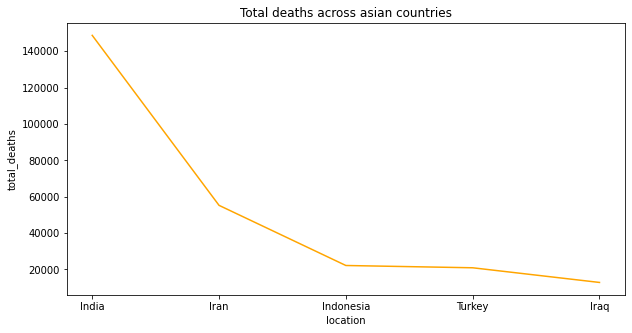

In [45]:
plt.figure(figsize=(10,5))
sns.lineplot(x='location',y='total_deaths',data=top_10_asia_deaths[0:5],color='orange')
plt.title("Total deaths across asian countries")

In [26]:

# Top 10 Asian countries with least number of  total_cases being reported
top_10_least_asia_cases = asia_data.sort_values("total_cases_per_million",ascending =True)
top_10_least_asia_cases.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
40770,LAO,Asia,Laos,2020-12-31,41.0,0.0,0.000,NaN,NaN,0.0,5.635,0.000,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.63,7275556.0,29.715,24.4,4.029,2.322,6397.360,22.7,368.111,4.00,7.3,51.2,49.839,1.5,67.92,0.613
80192,VNM,Asia,Vietnam,2020-12-31,1465.0,9.0,4.714,35.0,0.0,0.0,15.051,0.092,0.048,0.360,0.0,0.0,1.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.09,97338583.0,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.0,45.9,85.847,2.6,75.40,0.704
12834,KHM,Asia,Cambodia,2020-12-31,378.0,12.0,2.143,NaN,NaN,0.0,22.609,0.718,0.128,NaN,NaN,0.0,0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.63,16718971.0,90.672,25.6,4.412,2.385,3645.070,NaN,270.892,4.00,2.0,33.7,66.229,0.8,69.82,0.594
74158,TLS,Asia,Timor,2020-12-31,44.0,0.0,0.429,NaN,NaN,0.0,33.373,0.000,0.325,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.78,1318442.0,87.176,18.0,3.556,1.897,6570.102,30.3,335.346,6.86,6.3,78.1,28.178,5.9,69.50,0.606
72553,TWN,Asia,Taiwan,2020-12-31,799.0,2.0,3.286,7.0,0.0,0.0,33.548,0.084,0.138,0.294,0.0,0.0,0.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,126989.0,5.332,0.021,637.0,0.027,0.005,193.9,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN


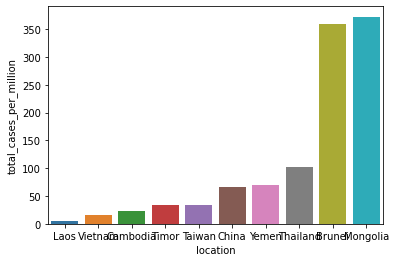

In [27]:
# Least number of toal_cases reported across Asian Countries
sns.barplot(x="location", y="total_cases_per_million", data=top_10_least_asia_cases.head(10))

Text(0.5, 1.0, 'Total Cases vs Total Death Scenarios')

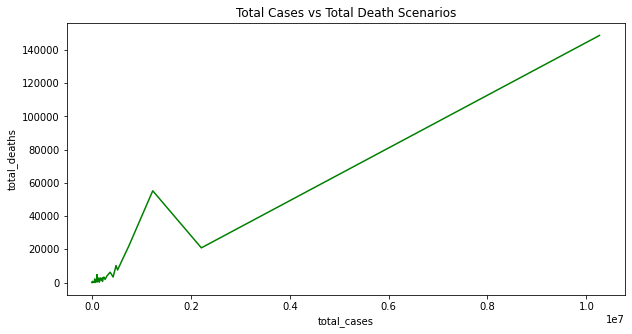

In [28]:

plt.figure(figsize=(10,5))
sns.lineplot(x='total_cases',y='total_deaths',data=asia_data,color="green")
plt.title("Total Cases vs Total Death Scenarios")

Text(0.5, 1.0, 'Total tests Vs Posititve Rate of cases ')

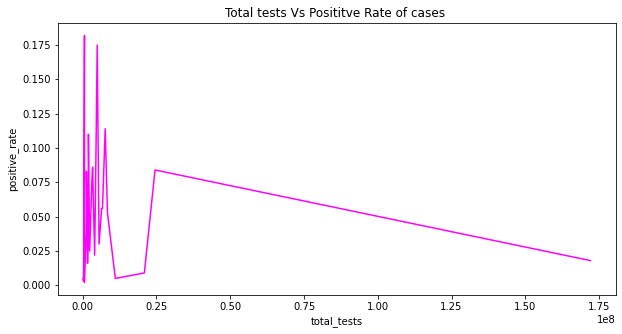

In [29]:
plt.figure(figsize=(10,5))
sns.lineplot(x='total_tests',y='positive_rate',data=asia_data,color="magenta")
plt.title("Total tests Vs Posititve Rate of cases ")

**Conclusion**

---





--> United States has been the most affected country worldwide.

--> India is the most affected Asian Country.

--> Laos has reported the least number of cases in Asia.

--> Marshall Islands (Oceania) has reported the least number of cases worldwide.